In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv')

In [3]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
filmes.rename(columns={'movieId':'filme_Id', 'title':'titulo', 'genres':'genero'}, inplace=True)
filmes.head()

,filme_Id,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Vamos reestruturar as dados da coluna genero, separando sua informação

In [5]:
generos = filmes.genero.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_Id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Vamos dar pesos aos nossos dados .. ou seja, reescalar eles

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

### Cluster - Vamos agrupar as categorias baseado nas escalas criadas 

In [9]:
from sklearn.cluster import KMeans

In [10]:
modelo = KMeans(n_clusters = 3) # passar a quantidade Clusters(grupos)
modelo.fit(generos_escalados)  # ajustar os dados

print('Grupos {}'.format(modelo.labels_))

Grupos [2 2 0 ... 0 2 0]


### Verificando a centroide de cada grupo

In [11]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[ 0.01659963 -0.02140276 -0.13747656 -0.25163156 -0.26888656  0.03423106
   0.07187413  0.05657394  0.16264043 -0.18480599  0.02243465 -0.3340552
  -0.0846927  -0.02588718 -0.02429202  0.08935326 -0.08622932 -0.02893397
   0.04921632  0.02185414]
 [-0.05917995 -0.1071379  -0.30590593 -0.22455736 -0.26224445 -0.40331257
  -0.1889115  -0.20752995 -0.55917873  0.01782691 -0.07294117  2.99351719
  -0.03834113 -0.14863592  0.33458158 -0.37557644  0.36348103  0.70814326
  -0.18603616 -0.06832945]
 [-0.05917995  0.22830722  1.1497281   1.82652943  1.97024795  0.11103118
  -0.31203167 -0.19685784 -0.59695162  1.19003026 -0.08581724 -0.30268991
   0.58390567  0.29192857 -0.11887466 -0.27130862  0.26096532 -0.39815327
  

In [12]:
grupos = pd.DataFrame(modelo.cluster_centers_,columns=generos.columns)
grupos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.01660,-0.021403,-0.137477,-0.251632,-0.268887,0.034231,0.071874,0.056574,0.162640,-0.184806,0.022435,-0.334055,-0.084693,-0.025887,-0.024292,0.089353,-0.086229,-0.028934,0.049216,0.021854
1,-0.05918,-0.107138,-0.305906,-0.224557,-0.262244,-0.403313,-0.188912,-0.207530,-0.559179,0.017827,-0.072941,2.993517,-0.038341,-0.148636,0.334582,-0.375576,0.363481,0.708143,-0.186036,-0.068329
2,-0.05918,0.228307,1.149728,1.826529,1.970248,0.111031,-0.312032,-0.196858,-0.596952,1.190030,-0.085817,-0.302690,0.583906,0.291929,-0.118875,-0.271309,0.260965,-0.398153,-0.166702,-0.085854


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DABF6787B8>,
      dtype=object)

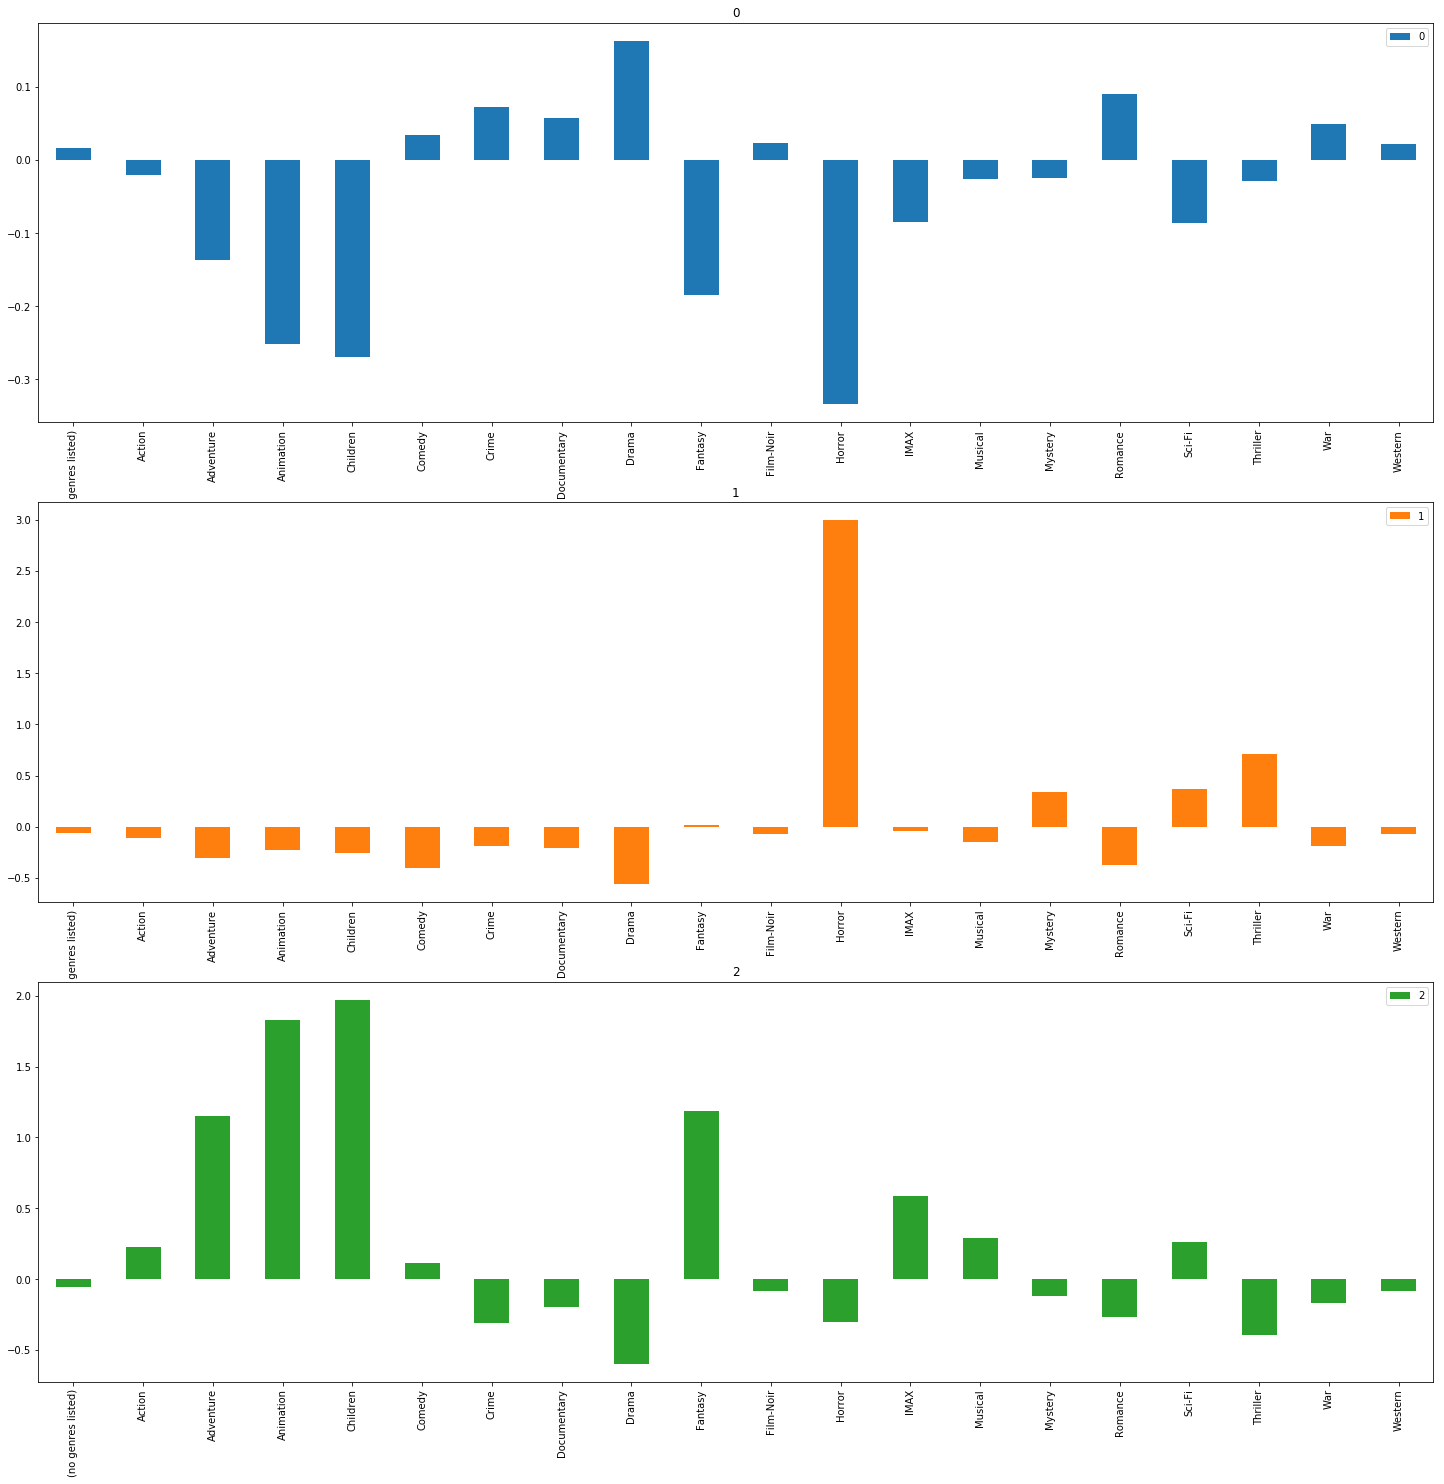

In [13]:
grupos.transpose().plot.bar(subplots=True,
               figsize = (25,25), 
               sharex =False,
               )

### Visualizando os clusters em formato de tabela 

In [14]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_Id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4335,6334,Blue Car (2002),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
621,786,Eraser (1996),Action|Drama|Thriller,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1117,1457,Fools Rush In (1997),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5007,7749,Weekend (a.k.a. Le Week-end) (Week End) (1967),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3476,4743,Tortilla Soup (2001),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3072,4125,Leonard Part 6 (1987),Comedy|Sci-Fi,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2057,2736,Brighton Beach Memoirs (1986),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7228,73431,"Maiden Heist, The (2009)",Comedy|Crime,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9130,146682,Twinsters (2015),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8321,107348,Anchorman 2: The Legend Continues (2013),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Visualizando os Clusters em Gráfico

In [15]:
from sklearn.manifold import TSNE

In [16]:
tsne = TSNE() # redução de dimencionalidade ( quando diminuimos a dimensão perdemos informações)

In [17]:
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-37.26101  , -58.082966 ],
       [-53.277077 ,  25.517536 ],
       [ -2.1976264,  32.60498  ],
       ...,
       [ -6.028438 ,   0.5098609],
       [-22.152843 , -45.329567 ],
       [ 32.679977 ,   4.5041094]], dtype=float32)

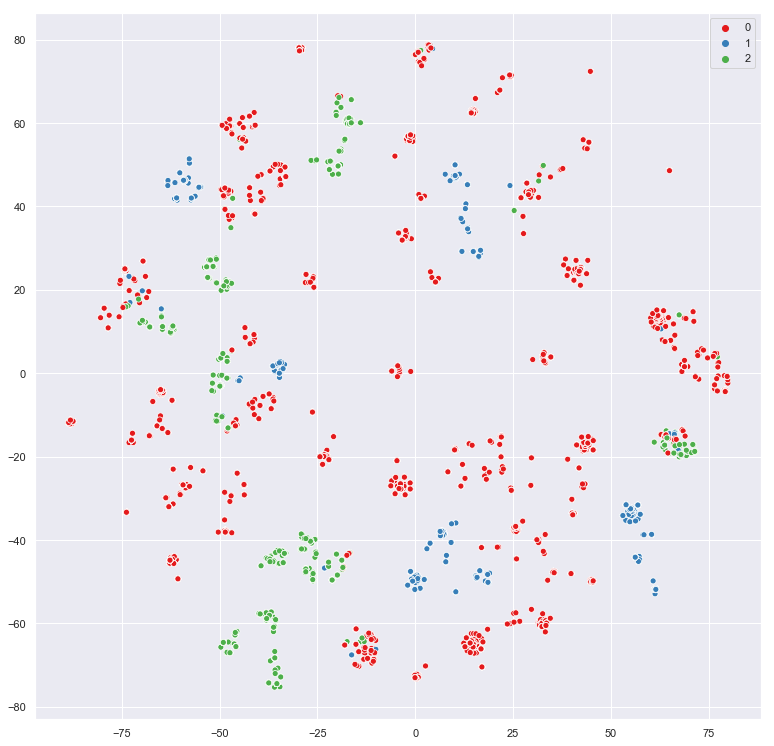

In [18]:
ax = sns.set(rc={'figure.figsize':(13,13)})
ax = sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1],hue=modelo.labels_, palette=sns.color_palette('Set1',3))
ax

## Escolhendo a quantidade de Clusters

In [19]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,columns=generos.columns)
grupos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,-0.153524,-0.251429,-0.226267,-0.184699,-0.505539,0.486517,-0.217489,0.138863,-0.034052,-0.094926,0.515816,-0.128397,-0.188419,4.000218,-0.145378,0.044395,1.166828,-0.202020,-0.132065
1,-0.05918,-0.480607,-0.275450,-0.258679,-0.218469,-0.792126,-0.374632,-0.217489,0.987860,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.009430,-0.202020,-0.132065
2,-0.05918,-0.462136,-0.364480,-0.238850,-0.260913,-0.604451,-0.338046,4.597924,-0.808396,-0.285947,-0.094926,-0.318057,-0.128397,-0.188419,-0.229553,-0.429644,-0.334435,-0.479111,-0.078173,-0.132065
3,-0.05918,-0.189201,1.396667,3.075475,3.697524,0.222847,-0.310837,-0.217489,-0.677465,0.599301,-0.094926,-0.324092,-0.128397,0.584934,-0.211811,-0.272757,-0.145313,-0.491259,-0.171169,-0.132065
4,-0.05918,2.080702,-0.385949,-0.258679,-0.170137,-0.105352,-0.374632,-0.217489,-0.205416,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.366739,-0.334435,0.360487,-0.202020,-0.132065


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DABE7B8F98>,
      dtype=object)

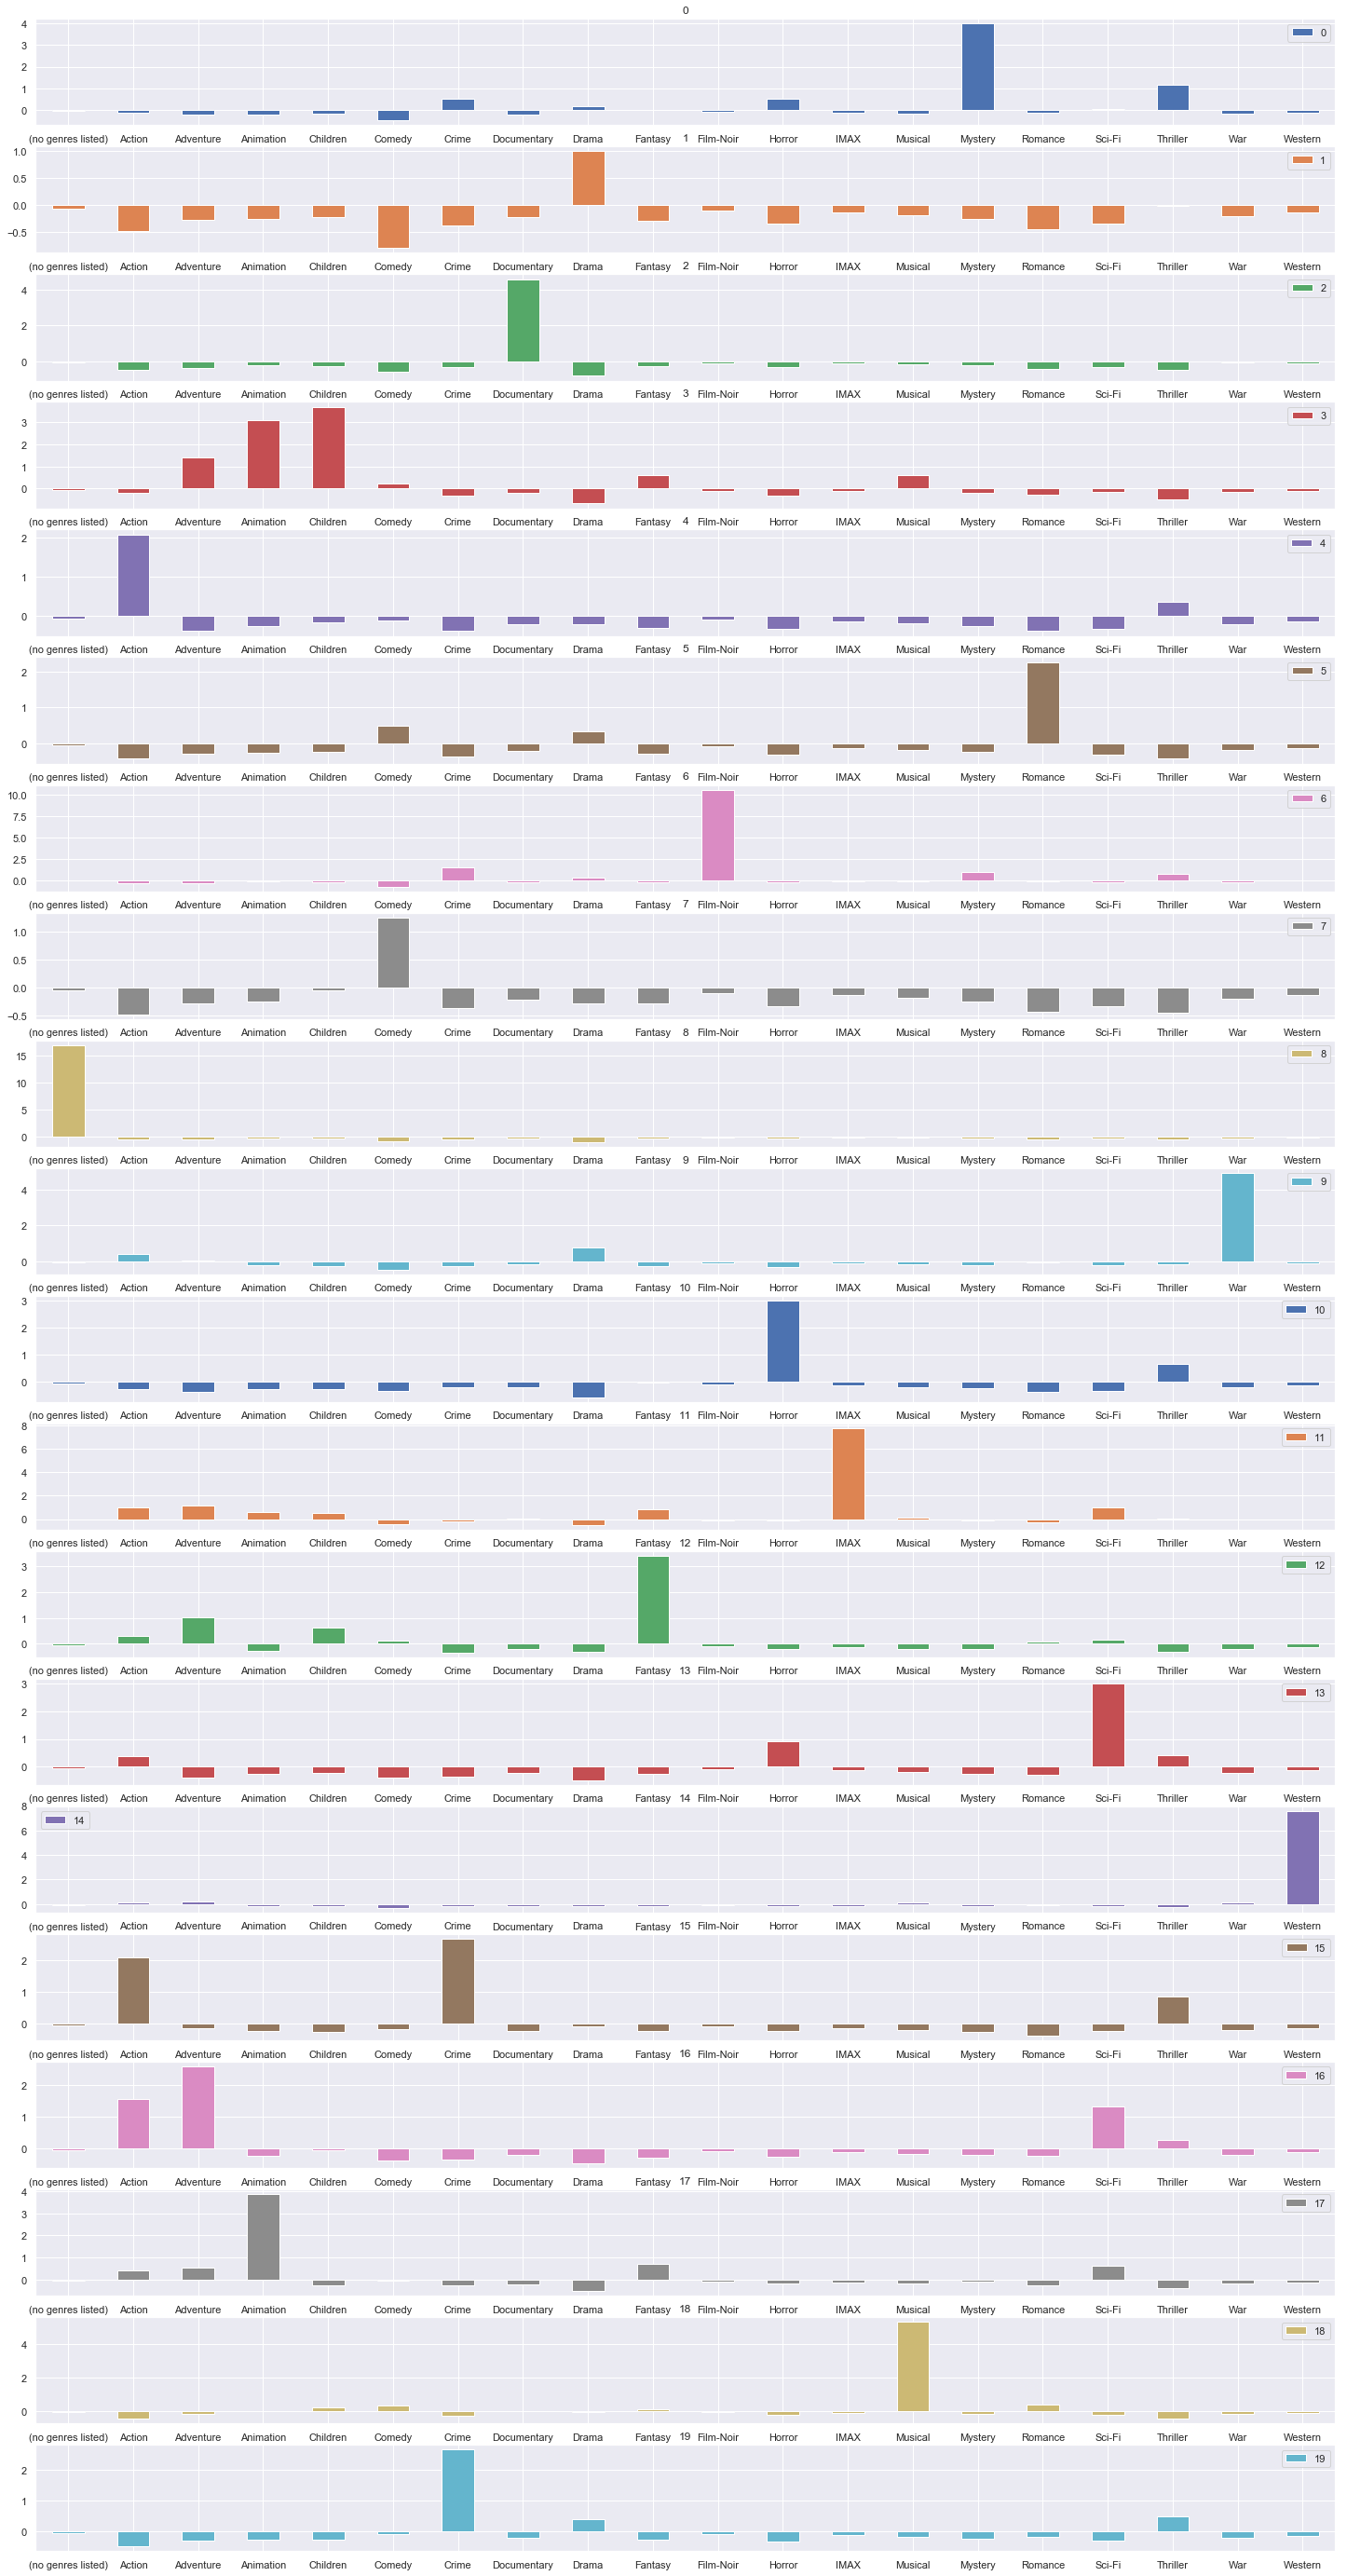

In [20]:
grupos.transpose().plot.bar(subplots=True,
                           figsize=(25,50),
                           sharex=False,
                           rot=0)

In [21]:
grupo = 15 

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_Id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8077,99728,Gangster Squad (2013),Action|Crime|Drama,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5225,8531,White Chicks (2004),Action|Comedy|Crime,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6013,37853,Into the Blue (2005),Action|Adventure|Crime|Thriller,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7191,72489,Ninja Assassin (2009),Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6142,43921,Running Scared (2006),Action|Crime|Thriller,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3222,4351,Point Break (1991),Action|Crime|Thriller,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2408,3197,"Presidio, The (1988)",Action|Crime|Romance|Thriller,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4533,6720,Kuffs (1992),Action|Comedy|Crime,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6263,47254,Chaos (2005),Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8306,106785,Homefront (2013),Action|Crime|Thriller,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [22]:
def kmeans(numero_de_clusters,generos):
    modelo = KMeans(n_clusters= numero_de_clusters)
    modelo.fit(generos)
    return(numero_de_clusters, modelo.inertia_)

In [23]:
kmeans(20,generos_escalados) # Erro referente a nossa quantidade de clusters

(20, 54916.764051188526)

In [24]:
kmeans(3,generos_escalados)

(3, 166157.2359098252)

In [26]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1,41)]
resultado

[(1, 194839.9999999991),
 (2, 179528.16927708065),
 (3, 167803.7548960169),
 (4, 158217.6931844424),
 (5, 146053.54433356132),
 (6, 136964.96200330785),
 (7, 128872.39629747263),
 (8, 118663.83175696176),
 (9, 110310.37049731826),
 (10, 101891.85357627552),
 (11, 95668.2962857631),
 (12, 86589.24799008487),
 (13, 81685.3229978808),
 (14, 73710.21943302029),
 (15, 66803.76613057186),
 (16, 63530.80839735075),
 (17, 62072.68985298937),
 (18, 58957.32534800423),
 (19, 56817.07322804877),
 (20, 55469.76879860191),
 (21, 53798.003135049345),
 (22, 51615.47308649169),
 (23, 50412.04629571893),
 (24, 49495.44752133672),
 (25, 47966.66058085507),
 (26, 46116.26248706359),
 (27, 45373.567200337864),
 (28, 45403.801279196145),
 (29, 43640.80826470797),
 (30, 42532.69425938768),
 (31, 42073.070263216025),
 (32, 40069.173941637804),
 (33, 40069.51071424593),
 (34, 39781.73769323895),
 (35, 38938.56637862193),
 (36, 37878.63686957085),
 (37, 36323.7457058477),
 (38, 36395.891366173215),
 (39, 36278

In [27]:
resultado = pd.DataFrame(resultado,
            columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179528.169277
2,3,167803.754896
3,4,158217.693184
4,5,146053.544334
5,6,136964.962003
6,7,128872.396297
7,8,118663.831757
8,9,110310.370497
9,10,101891.853576


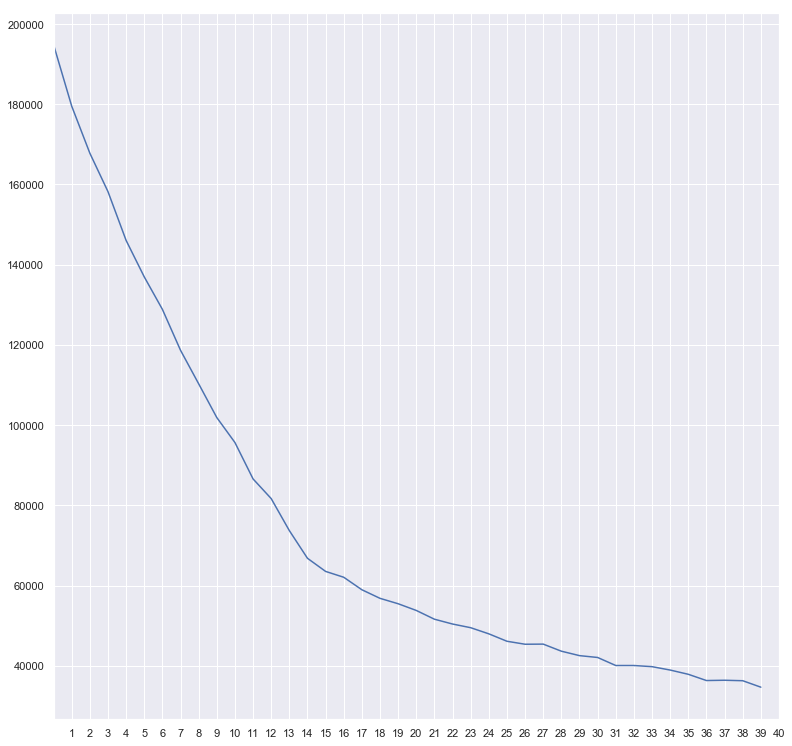

In [32]:
resultado.inertia.plot(xticks= resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DAC6A0A5F8>,
      dtype=object)

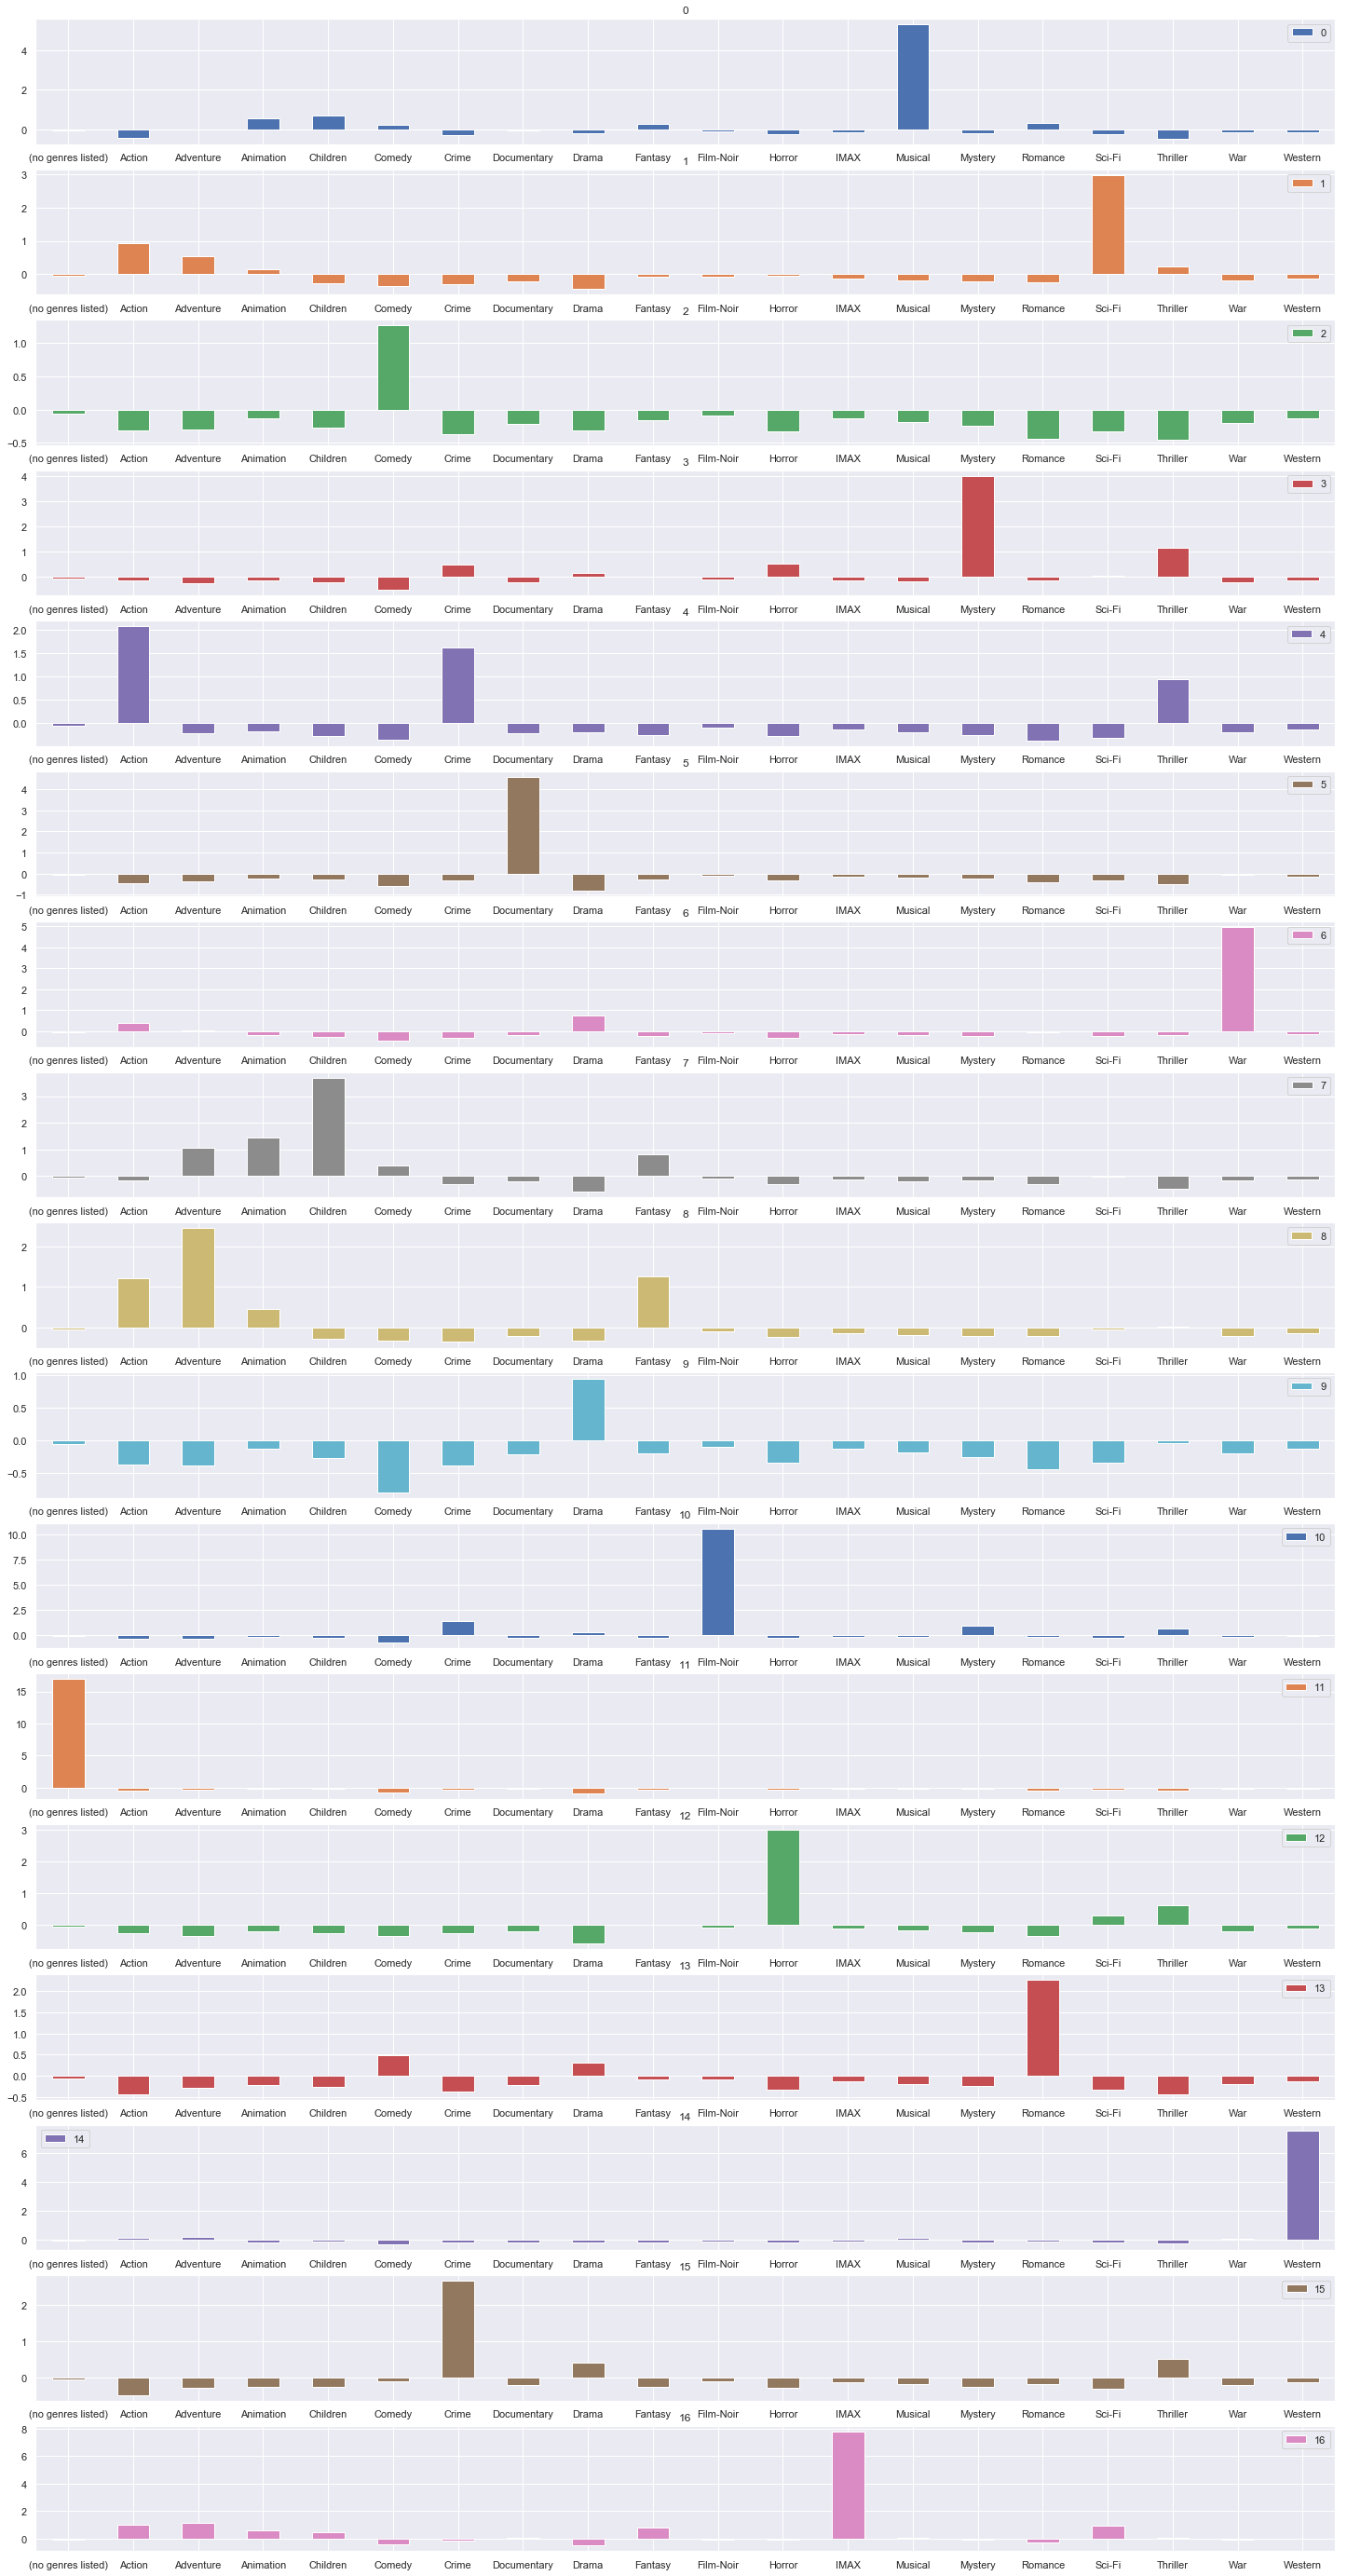

In [35]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,columns=generos.columns)
grupos.transpose().plot.bar(subplots=True,
               figsize = (25,50), 
               sharex =False,
               rot=0)

In [37]:
grupo = 1

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_Id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3605,4952,Morons From Outer Space (1985),Comedy|Sci-Fi,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8095,100302,Upside Down (2012),Drama|Romance|Sci-Fi,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
6778,60161,Futurama: The Beast with a Billion Backs (2008),Action|Animation|Comedy|Romance|Sci-Fi,0,1,0,1,0,1,0,...,0,0,0,0,0,1,1,0,0,0
6825,61210,Mutant Chronicles (2008),Action|Adventure|Sci-Fi,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2928,3927,Fantastic Voyage (1966),Adventure|Sci-Fi,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8697,122922,Doctor Strange (2016),Action|Adventure|Sci-Fi,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1978,2625,Black Mask (Hak hap) (1996),Action|Adventure|Crime|Sci-Fi|Thriller,0,1,1,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
1486,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8084,99917,Upstream Color (2013),Romance|Sci-Fi|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
858,1129,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


## Agrupamento Hierárquico - 

In [38]:
from sklearn.cluster import AgglomerativeClustering

In [39]:
modelo = AgglomerativeClustering(n_clusters=17)

In [40]:
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3], dtype=int64)

In [41]:
tsne = TSNE()
visualizacao =tsne.fit_transform(generos_escalados)
visualizacao

array([[-62.189697 ,   0.353213 ],
       [ 35.6969   , -44.960697 ],
       [ 37.440918 , -15.583359 ],
       ...,
       [ -3.6819563,  -5.7093472],
       [-49.589703 , -41.52865  ],
       [-13.655632 ,  27.687616 ]], dtype=float32)

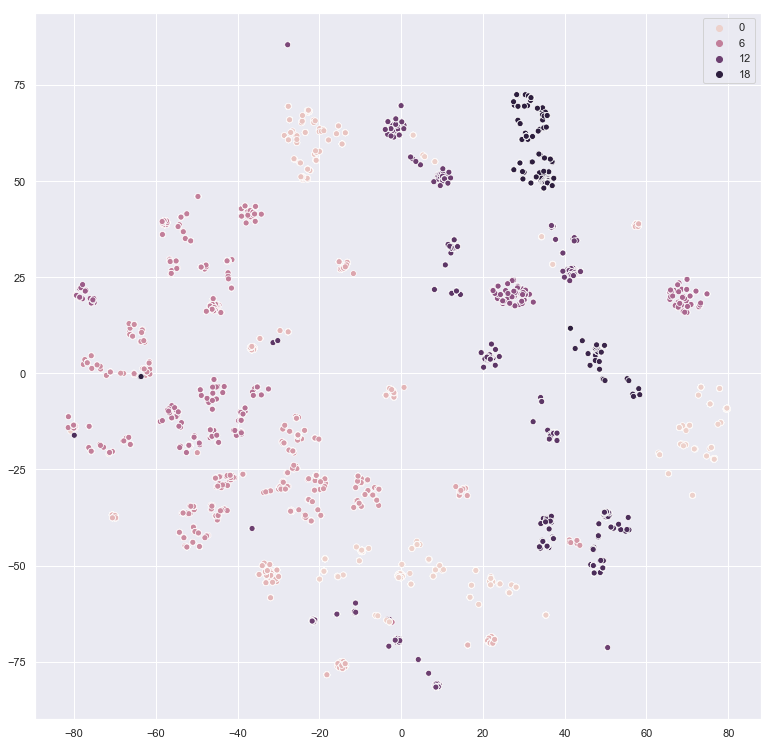

In [48]:
sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue=grupos)

## Plotando um gráfico em arvore

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DAC9AC4240>,
      dtype=object)

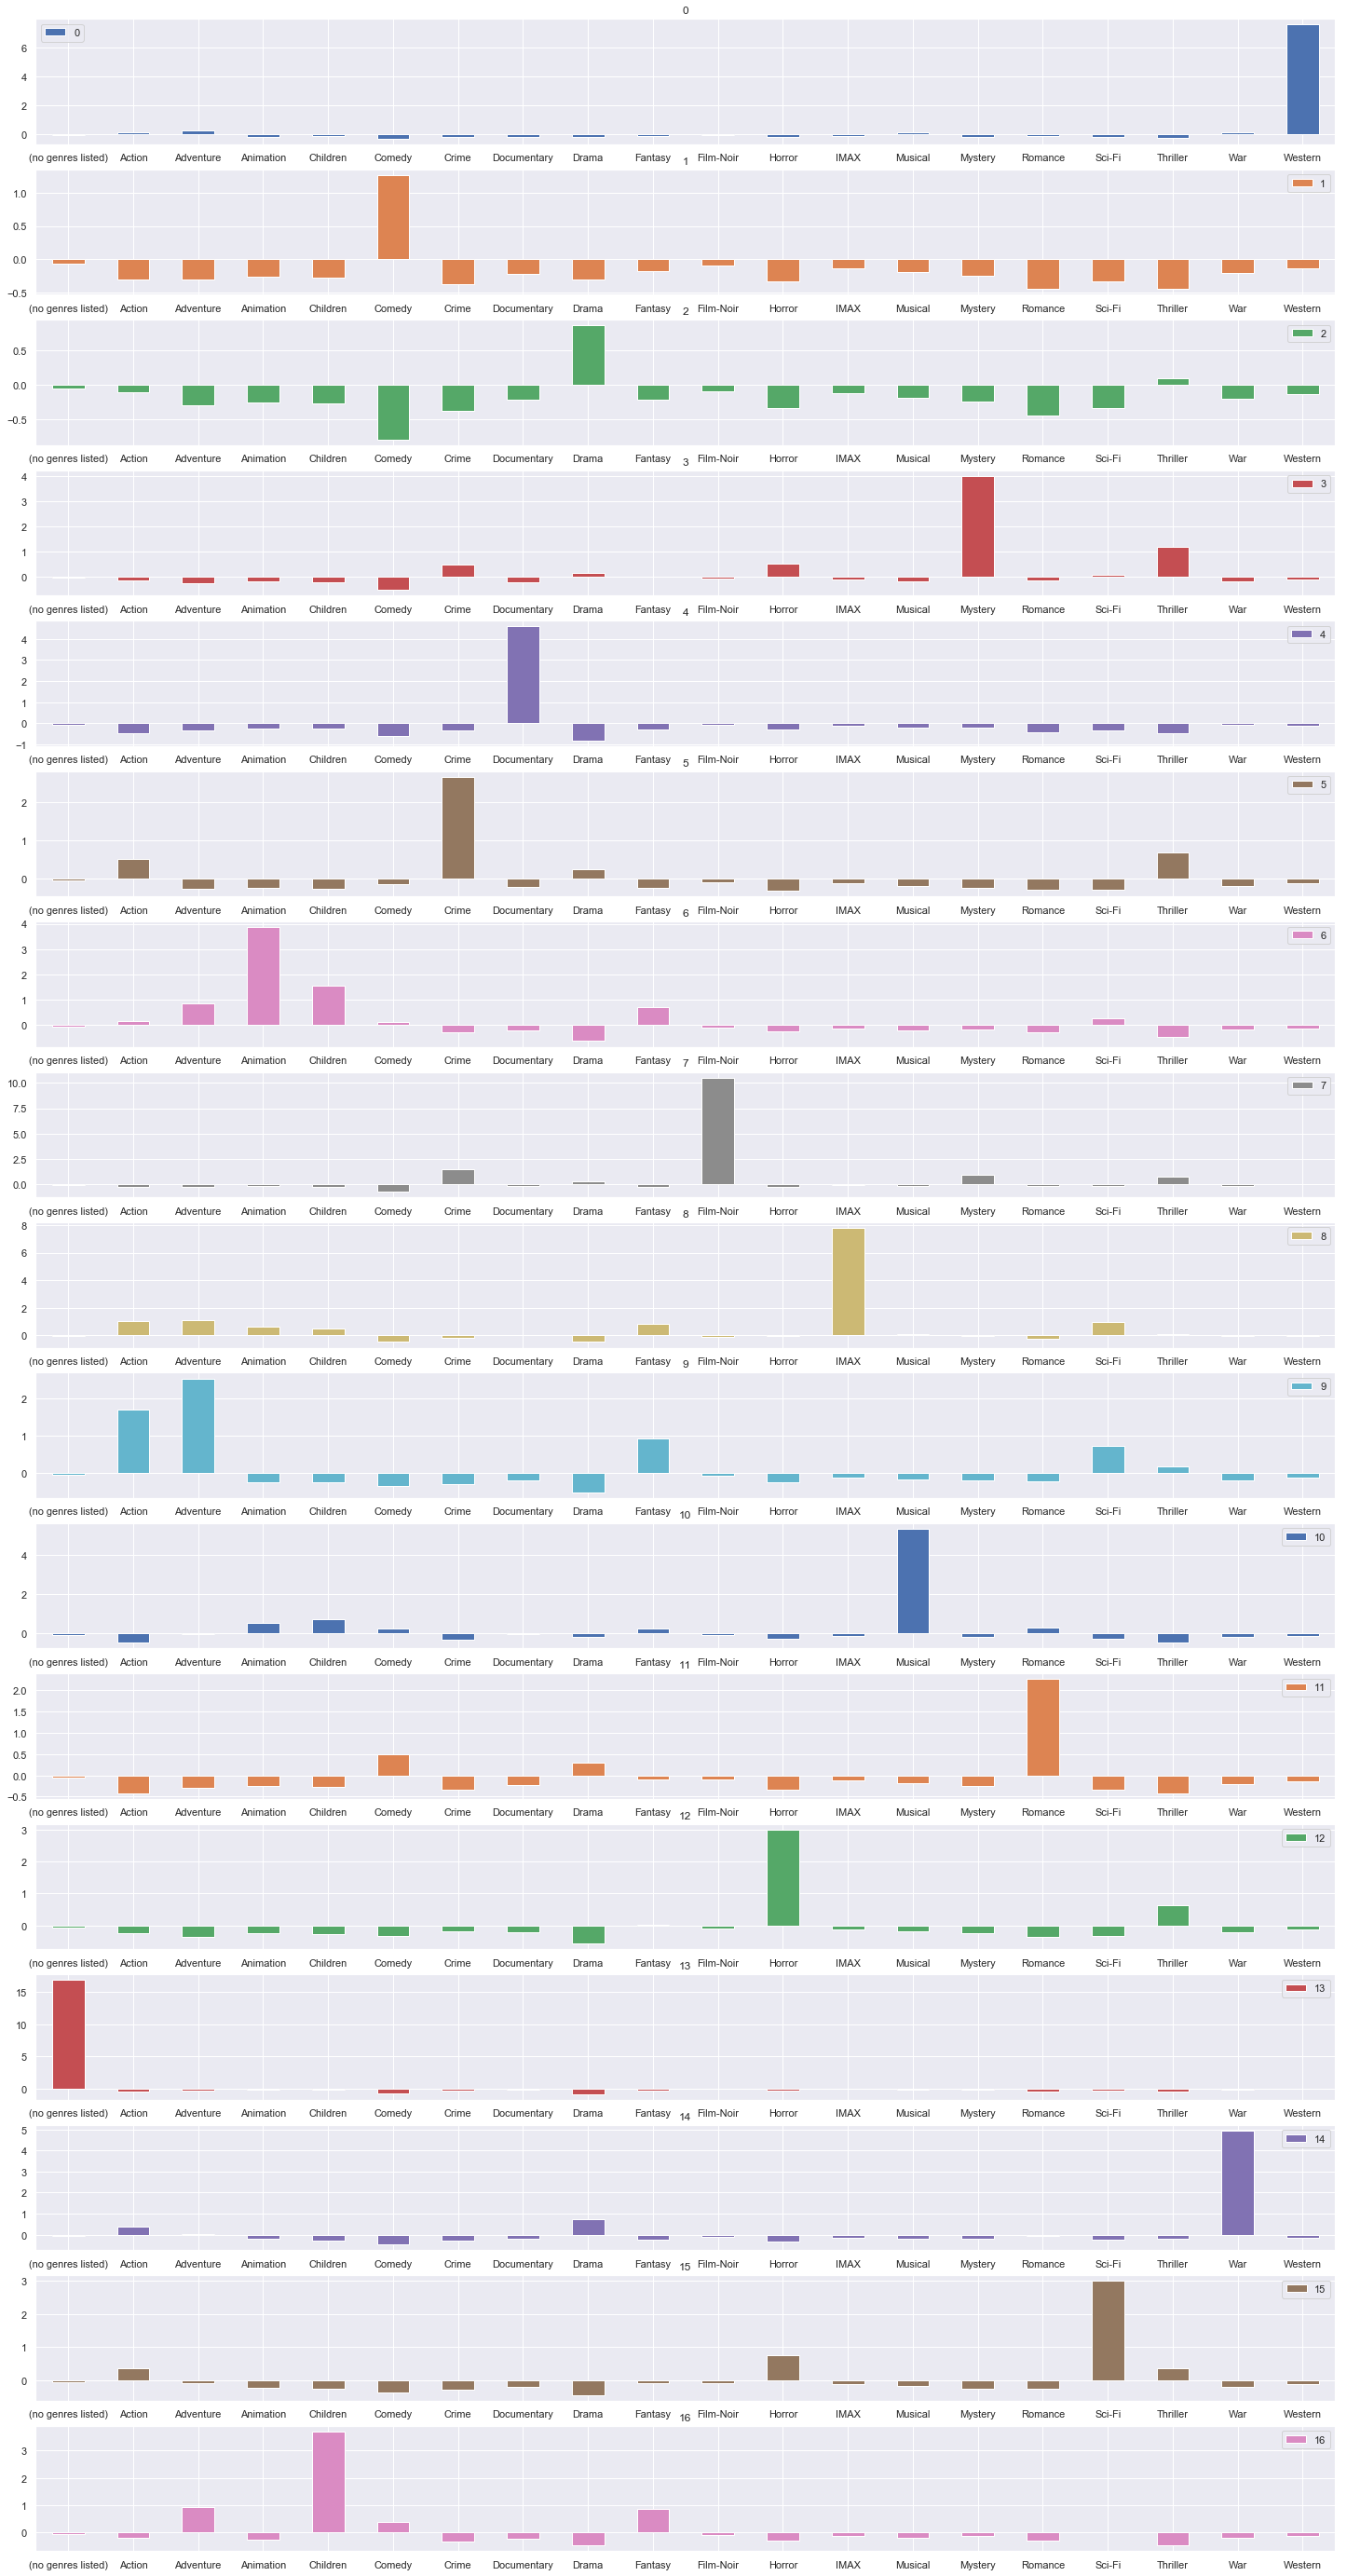

In [51]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,columns=generos.columns)
grupos.transpose().plot.bar(subplots=True,
               figsize = (25,50), 
               sharex =False,
               rot=0)

In [52]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 1.        ,  2.        ,  2.41910952,  2.        ],
       [11.        , 17.        ,  2.87956451,  3.        ],
       [ 5.        , 18.        ,  3.2849296 ,  4.        ],
       [12.        , 19.        ,  3.70049444,  5.        ],
       [15.        , 20.        ,  3.8060993 ,  6.        ],
       [ 9.        , 21.        ,  4.00016008,  7.        ],
       [16.        , 22.        ,  4.38570568,  8.        ],
       [ 3.        , 23.        ,  4.6455274 ,  9.        ],
       [ 6.        , 24.        ,  4.67955588, 10.        ],
       [ 4.        , 25.        ,  5.1427482 , 11.        ],
       [14.        , 26.        ,  5.22424647, 12.        ],
       [10.        , 27.        ,  5.81741832, 13.        ],
       [ 0.        , 28.        ,  7.84661998, 14.        ],
       [ 8.        , 29.        ,  8.17745182, 15.        ],
       [ 7.        , 30.        , 10.81473171, 16.        ],
       [13.        , 31.        , 17.06135489, 17.        ]])

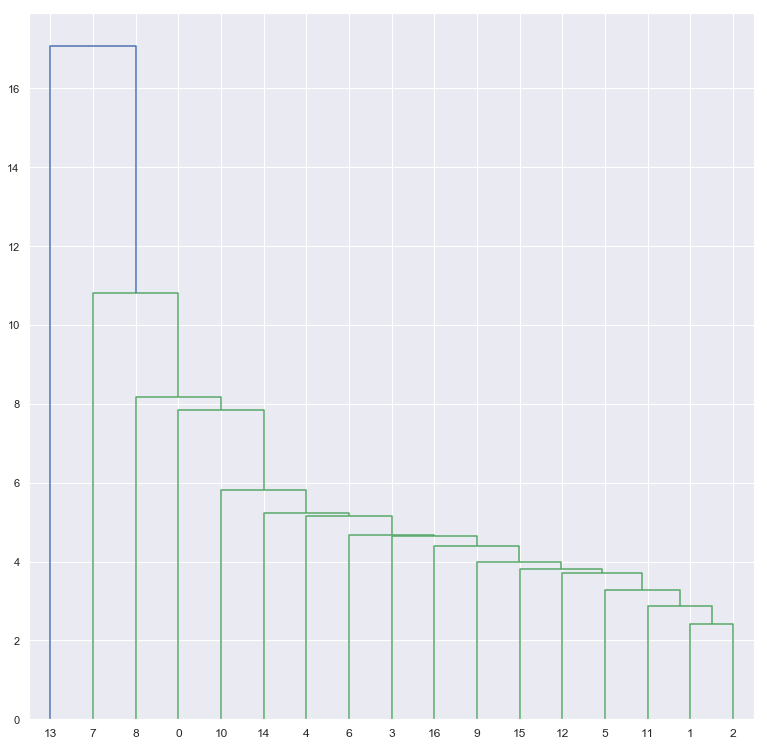

In [53]:
dendrograma = dendrogram(matriz_de_distancia)

## Assim conseguimos identificar os grupos que estão pertos